## {{cookiecutter.project_name}}

{{cookiecutter.description}}

This notebook contains basic statistical analysis and visualization of the data.


### Data Sources
- summary : Processed file from notebook 1-Data_Prep

### Changes
- {% now 'utc', '%m-%d-%Y' %} : Started project

In [ ]:
import pandas as pd
from pathlib import Path
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
import datetime

In [ ]:
%matplotlib inline

In [ ]:
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.options.display.float_format = '{:,.2f}'.format

today = datetime.date.today()

### (1) File Locations

In [ ]:
in_file = ''
out_file = ''

### (2) Read file

#### (i) Read a CSV file

In [ ]:
df = pd.read_csv(in_file)

#### (ii) Read an Excel file

In [ ]:
sheet1 = '' # Sheet name in the excel file
sheet2 = '' # Sheet name in the excel file

with pd.ExcelFile(in_file) as reader:
    df1 = pd.read_excel(reader, sheet_name=sheet1, header=None)
    df2 = pd.read_excel(reader, sheet_name=sheet2, header=None)

#### (iii) Read a pickle file

In [ ]:
df = pd.read_pickle(in_file)

In [ ]:
df = df.reindex(columns=['col1', 'col3', 'col2'])

### (3) Perform data analysis

#### REFERENCES

**DATAFRAME**

- https://pbpython.com/excel-pandas-comp.html
- https://pbpython.com/excel-pandas-comp-2.html
- Merging dataframes: https://stackoverflow.com/questions/53645882/pandas-merging-101
- Concatenating dataframes: https://stackoverflow.com/questions/49620538/what-are-the-levels-keys-and-names-arguments-for-in-pandas-concat-functio

**PIVOT TABLE**

- https://pbpython.com/pandas-pivot-table-explained.html
- https://stackoverflow.com/questions/47152691/how-can-i-pivot-a-dataframe

In [ ]:
# Dataframe: check for unique values per column
# - Apply on whole dataframe
boolean = df.duplicated().any() # False
df.values_count()

# - Apply on subset of dataframe
boolean = df.duplicated(subset=['Student','Date']).any() # False
boolean = df.duplicated(subset=['Student']).any() # True
df["name"].unique()
boolean = not df['col'].is_unique      # True
boolean = df['col'].duplicated().any() # True

# Dataframe: removing duplicates
df.drop_duplicates(subset=["col1","col2"], inplace=True)

#0,1 represent the cols that you want to retain from the filtered dataframe
df.drop_duplicates(subset=["col1","col2"]).iloc[:,[0,1]] 

#### ---------- GENERAL DATAFRAME MANIPULATION ----------

In [ ]:
# Dataframe: filtering data
df[df["col"]==value] 
df[df['date'] >='20140905']
df[df['date'] >='2014-03']
df[(df['date'] >='20140701') & (df['date'] <= '20140715')] # Show all cols after filtering
df.loc[(df['date'] >='20140701') & (df['date'] <= '20140715'), ["col1", "col2"]] # col1,2 are cols you want to show
df[df["account number"].isin([714466,218895])]
df[df["col"].map(lambda x: x.startswith('B1'))]
df[df["col"].map(lambda x: x.startswith('B1')) & (df["quantity"] > 22)]
df[df['col'].str.contains('B1')]
df[(df['sku'].str.contains('B1-531')) & (df['quantity']>40)].sort_values(by=['quantity','name'],ascending=[0,1])
df[df.index.isin(my_list)] # Filter by index

In [ ]:
# Dataframe: filter & edit
# Filter the rows with date constraints, then for col1 set value to 0.05 and col2 value to 1.25
df.loc[(df['date'] >='20140701') & (df['date'] <= '20140715'), ["col1"]] = 0.05
df.loc[(df['date'] >='20140701') & (df['date'] <= '20140715'), ["col1", "col2"]] = 0.05, 1.25

In [ ]:
# Apply a format to the whole dataframe
def money(x):
    return "${:,.0f}".format(x)

formatted_df = df.applymap(money)
formatted_df

In [ ]:
# Dataframe: Create a total sum row
sum_row = df[['col3', 'col4', 'col5']].sum() # List cols that need sum row
df_sum = pd.DataFrame(data=sum_row).T # create a new DF
df_sum=df_sum.reindex(columns=df.columns) # add all the cols in the original DF to the new DF
df_final=df.append(df_sum,ignore_index=True) #append the new DF to the old DF

In [ ]:
df['col'] = df[['col1', 'col2']].copy()

#### ---------- GROUPBY MANIPULATION ----------

**Grouping & aggregating data**

1. Aggregation basics
2. Custom aggregation functions
3. Custom functions with multiple columns
4. Working with group objects after aggretation has been run on them
5. Calculate subtotals
6. Using sparklines in aggregation functions
7. Flattening Hierarchical Column Indices
8. Selecting parts of the groupBy

(1) aggfunc aggregation basics

    - using basic inbuilt functions
    - working with time series grouping
    - formatting data

References:
- https://pbpython.com/groupby-agg.html
- https://pbpython.com/pandas-grouper-agg.html
- https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
- https://mkaz.blog/code/python-string-format-cookbook/
- https://pbpython.com/styling-pandas.html
- https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/47103408#47103408
- https://pandas.pydata.org/pandas-docs/version/0.22/generated/pandas.core.groupby.DataFrameGroupBy.agg.html

In [ ]:
# Grouping & aggregating data
# Step 1: How to be aggregated
agg_func = {'col2': ['sum', 'mean', 'median', 'min', 'max', 'std', 'var', 'mad', 'prod']} # or
agg_func = {'col2': ['describe']}
# 'count' will not include NaN values whereas 'size' will
# nunique function will exclude NaN values in the unique counts
agg_func = {'col2': ['count', 'nunique', 'size']}
 # first and last values. Needs to be sorted first. Can also use min, max
agg_func = {'col2': ['first', 'last']} 
agg_func = {'fare': ['idxmax', 'idxmin']} # idxmax and idxmin to get the index value of row
# Use also stats functions (scipy or numpy)
from scipy.stats import skew, mode
agg_func = {'fare': [skew, mode, pd.Series.mode]} # 'mode': returns most freq value & count
# 'Set' display full list of unique values
agg_func = {'deck': [ 'nunique', mode, set]}
# Aggregating multiple columns
agg_func = {'col2': ['describe', np.sum, np.mean], 'col3':[np.sum, np.mean]}


# Step 2: Define groupby
df.groupby(['col1']).agg(agg_func).round(2)
df.sort_values(by=['fare'], ascending=False).groupby(['col1']).agg(agg_func)

In [ ]:
# Grouping time series data
# Reference: https://pbpython.com/pandas-grouper-agg.html
# Date offsets: https://pandas.pydata.org/pandas-docs/stable/user_guide/timeseries.html#dateoffset-objects
df.groupby(['name', pd.Grouper(key='date', freq='M')])['ext price'].sum()

year_grp = df.groupby(df['DATE_SOLD'].dt.year) # dt.year helps present the data as only year

In [ ]:
# Formatting
# Reference: 
# - https://mkaz.blog/code/python-string-format-cookbook/
# - https://pbpython.com/styling-pandas.html
df.groupby('name')['ext price'].agg(['mean', 'sum']).style.format('${0:,.2f}')

# If groupby has multiple columns and each is formatted differently
format_dict = {'sum':'${0:,.0f}', 'date': '{:%m-%Y}', 'pct_of_total': '{:.2%}'}
monthly_sales.style.format(format_dict).hide_index()

# Add higlighting to cell
monthly_sales
 .style
 .format(format_dict)
 .hide_index()
 .highlight_max(color='lightgreen')
 .highlight_min(color='#cd4f39'))
    
# Add background gradient
(monthly_sales.style
 .format(format_dict)
 .background_gradient(subset=['sum'], cmap='BuGn'))

(2) Custom aggregation functions

In [ ]:
# Custom aggregation functions
# Step 1: Define custom aggregation function
# eg1: define a wrapper function
def percentile_25(x):
    return x.quantile(.25)

# (or) eg2: define a lambda function and give it a name
lambda_25 = lambda x: x.quantile(.25)
lambda_25.__name__ = 'lambda_25%'

# Step 2: Use the custom aggregation fucntion
# Use eg1, eg2 and also additionally define inline lambda function directly in aggfunc
agg_func = {'col2': [percentile_25, lambda_25, , lambda x: x.quantile(.25)]
            
# Step 3: Use the aggregation function
df.groupby(['col1']).agg(agg_func).round(2)

In [ ]:
# Aggregate the sum of the 10 largest and 10 smallest values
def top_10_sum(x):
    return x.nlargest(10).sum()

def bottom_10_sum(x):
    return x.nsmallest(10).sum()

agg_func = {'col2': [top_10_sum, bottom_10_sum]}
df.groupby('col1').agg(agg_func)

# (or) -------

agg_func = ({'col3':[np.sum, np.mean, np.min, np.max]})

df[['col2', 'col3', 'col4']]
.groupby(['col1'])
.agg(agg_func)
.sort_values([('col3', 'sum')],ascending=False) # Tuple needed in case of multi index columns in aggfunc
.nlargest(10, ('col3', 'sum')) # Tuple needed in case of multi index columns in aggfunc

(3) Custom functions with multiple columns

Reference: https://stackoverflow.com/questions/14529838/apply-multiple-functions-to-multiple-groupby-columns/47103408#47103408

In [ ]:
def summary(x):
    result = {
        'fare_sum': x['fare'].sum(),  # fare_sum is the column label. 'fare' is col to sum
        'fare_mean': x['fare'].mean(),
        'fare_range': x['fare'].max() - x['fare'].min()
    }
    return pd.Series(result).round(0)

df.groupby(['class']).apply(summary)

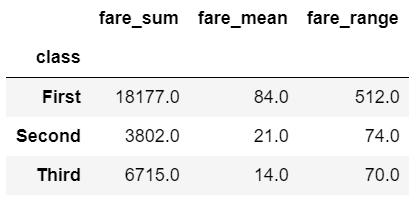

(4) Working with group objects after aggretation has been run on them

In [ ]:
# Calculate a percent of sum column calculated
df.groupby(['embark_town', 'class']).agg({'fare': 'sum'}).assign(
                                    pct_total=lambda x: x / x.sum())

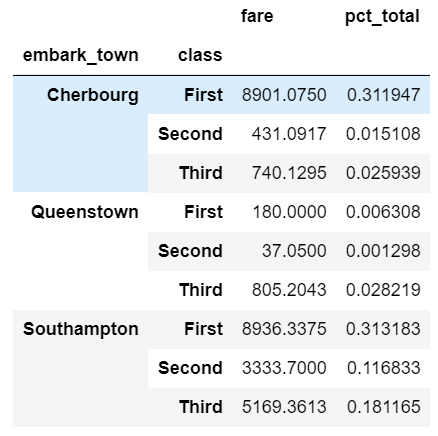

In [ ]:
fare_group = df.groupby(['embark_town', 'class']).agg({'fare': 'sum'})
fare_group.groupby(level=0).cumsum() # group level 0 refers to the 'embark_town' level

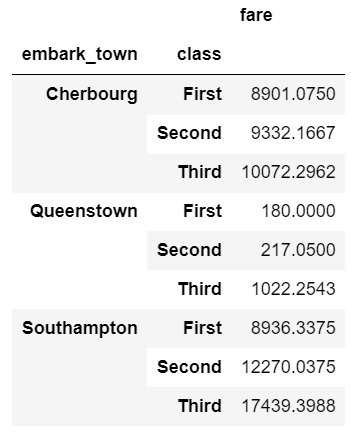

(5) Calculate subtotal

In [ ]:
import sidetable
df.groupby(['class', 'embark_town', 'sex']).agg({'fare': 'sum'}).stb.subtotal()

In [ ]:
# Unclear usage!!!
# Groupby: create a subtotal 
df_new=df_old[["col1","col2","col3"]].groupby('col4').sum()

(6) Using sparklines in aggregation functions

In [ ]:
# Use sparkline in aggregation function
def sparkline_str(x):
    bins=np.histogram(x)[0]
    sl = ''.join(sparklines(bins))
    return sl

agg_func = {'col3': [sparkline_str]}
df.groupby(['col1', 'col2']).agg(agg_func)

(7) Flattening Hierarchical Column Indices

In [ ]:
multi_df = df.groupby(['embark_town', 'class'], as_index=False).agg({'fare': ['sum', 'mean']})
multi_df.columns = ['_'.join(col).rstrip('_') for col in multi_df.columns.values]

(8) Selecting parts of the groupBy

In [ ]:
# Get part of the groupby dataframe using a key (the groupby key)
# Reference: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.groupby.GroupBy.get_group.html

In [21]: groupBy.get_group('foo')
Out[21]: 
     A         B   C
0  foo  1.624345   5
2  foo -0.528172  11
4  foo  0.865408  14

In [ ]:
# Select different columns using the groupby slicing
In [22]: groupBy[["A", "B"]].get_group("foo")
Out[22]:
     A         B
0  foo  1.624345
2  foo -0.528172
4  foo  0.865408

In [23]: groupBy["C"].get_group("foo")
Out[23]:
0     5
2    11
4    14

In [ ]:
groups = dict(list(groupBy))
groups['foo']
     A         B   C
0  foo  1.624345   5
2  foo -0.528172  11
4  foo  0.865408  14

#### ---------- PIVOT TABLE MANIPULATION ----------

In [ ]:
# PIVOT TABLE: create
df_pvt = pd.pivot_table(data=df, 
                index=['col1'], 
                columns=['col2'], 
                values=['col3'], 
                aggfunc={'col4':np.mean},
                margins=True,
                fill_value=0, 
                dropna=True)

In [ ]:
# PIVOT TABLE: FILTER BY INDEX
df[df.index.str.contains('XYZ')] # Can also use above methods 

In [ ]:
# Transform pivot table to a regular dataframe
# https://stackoverflow.com/questions/43756052/transform-pandas-pivot-table-to-regular-dataframe
df.columns = df.columns.droplevel(0) #remove amount
df.columns.name = None               #remove categories
df = df.reset_index()                #index to columns

In [ ]:
# Percent of Grand Total
# https://www.absentdata.com/pandas/pandas-pivot-table/
df_pvt = pd.pivot_table(data=df,
                index=['WEIGHT'],
                # columns=['DATE_SOLD'],
                values=['ID_PRODUCT'],
                aggfunc= lambda x:x.sum()/df['ID_PRODUCT'].sum(),
                margins=True,
                fill_value=0,
                dropna=True)
# Note: If you add more columns, it takes % of Grand total!

In [ ]:
# Visualise the total weight distribution
fig, (ax) = plt.subplots()
bins=np.arange(0,df.WEIGHT.max(), step=1)
ax.hist(df.WEIGHT, bins=bins, histtype="step", label='All JP sellers', edgecolor='black')

fig.tight_layout()
fig.title = ('Distribution of weights of all products sent from JP to HK')

ax.axvline(df.WEIGHT.mean(), color='red', linestyle='--')

ax.set_xlabel('Weights (Kgs)')
ax.set_ylabel('Count of products')
ax.set_xticks(np.arange(0,df.WEIGHT.max(), step=5))
ax.legend(loc='upper right')

### (3) Save Excel file into reports directory

Save an Excel file with intermediate results into the report directory

In [ ]:
writer = pd.ExcelWriter(report_file, engine='xlsxwriter')

In [ ]:
with pd.ExcelWriter(report_file,
                engine='xlsxwriter',
                date_format='mmm-yyyy',
                datetime_format='mmm-yyyy') as writer:
    sales_summary.to_excel(writer, sheet_name='2018-sales')
    workbook = writer.book
    workbook.set_properties({
        'category': r'c:\Users\cmoffitt\Documents\notebooks\customer_analysis',
        'title' : '2018 Sales Summary',
        'subject': 'Analysis for Anne Analyst',
        'author': '1-Excel-Properties.ipynb',
        'status': 'Initial draft',
        'comments': 'src_dir: customer_analysis',
        'keywords': 'notebook-generated'
    })

In [ ]:
df.to_excel(writer, sheet_name='Report')

In [ ]:
writer.save()